In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4400,5.0,8,795000


In [3]:
#find out any missing values in the dataset
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [4]:
#fill the missing data (NaN) with the median of bedrooms
med = int(df.bedrooms.median())
med

4

In [5]:
#fill the missing data with this median value
df.bedrooms = df.bedrooms.fillna(med)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4400,5.0,8,795000


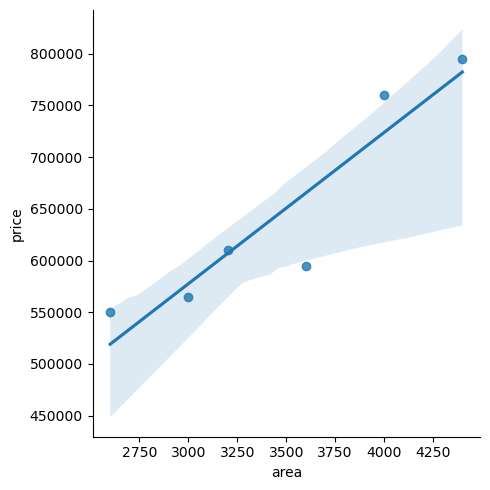

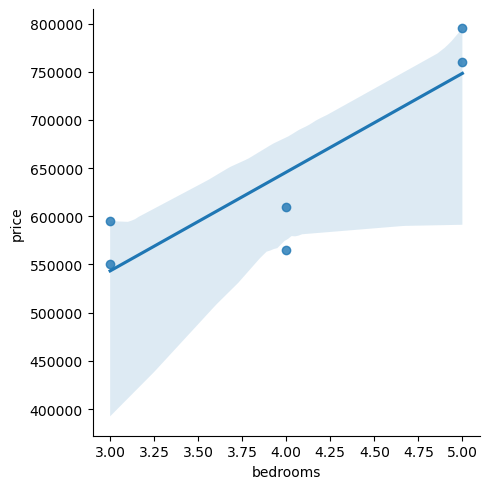

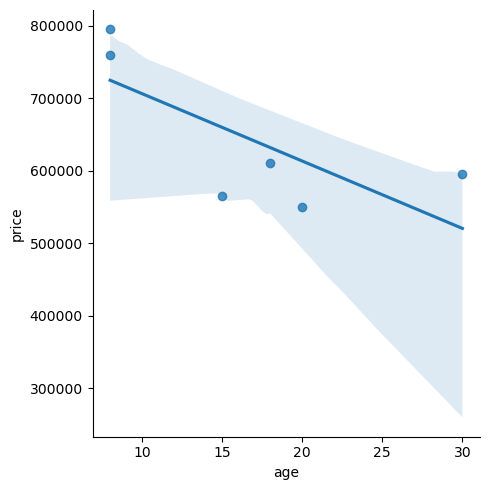

In [6]:
#represent the relations between independent and dependent vars
sns.lmplot(x='area',y='price',data=df)
sns.lmplot(x='bedrooms',y='price',data=df)
sns.lmplot(x='age',y='price',data=df)

In [7]:
#create the linear regression model with multi variables
#take the independent vars first and the dependent vars next
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['area','bedrooms','age']], df['price'])

LinearRegression()

In [8]:
reg.coef_

array([   142.895644  , -48591.66405516,  -8529.30115951])

In [9]:
reg.intercept_

485561.8928233979

In [11]:
#predict the price of 3000 sqft house, 3 bedrooms and 40yrs age
reg.predict([[3000,3,40]])

array([427301.78627387])

In [12]:
#predict the price of 2500 sqft house, 4 bedrooms and 5yrs age
reg.predict([[2500,4,5]])

array([605787.84080221])